In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') 
nltk.download('punkt')  
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chakr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df = pd.read_csv("clean_chatgpt_reviews.csv")

In [4]:
df.head()

,Unnamed: 0,userName,content,score,thumbsUpCount,at
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50


In [5]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# Apply preprocessing to the reviews
df['cleaned_reviews'] = df['content'].apply(preprocess_text)

# Set up TextVectorization layer in TensorFlow
max_tokens = 20000  # Adjust this depending on vocabulary size
max_len = 100  # Adjust this depending on the sequence length you want

vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode='int',  # You can change this to 'tf-idf' if you prefer similar behavior to TF-IDF
    output_sequence_length=max_len  # Limit sequences to a certain length
)

# Adapt the vectorizer to your cleaned reviews
vectorizer.adapt(df['cleaned_reviews'].values)

# Vectorize the reviews
X = vectorizer(df['cleaned_reviews'].values)

# Convert to numpy for further use (if needed)
X_numpy = X.numpy()

print("Vectorized reviews shape:", X_numpy.shape)

# X will now be your vectorized matrix



Vectorized reviews shape: (149719, 100)


In [6]:
df

,Unnamed: 0,userName,content,score,thumbsUpCount,at,cleaned_reviews
0,0,T H (Trudylh20),excellent Im impressed 👌 👏,5,0,28-06-2024 21:07,excellent im impressed
1,1,Muhammad bassam adam,perfect,5,0,28-06-2024 20:56,perfect
2,2,Chinaza Okoli,its been so helpful...love it,5,0,28-06-2024 20:54,helpfullove
3,3,Project House Group Ltd,It's amazing tools help me a lot with my work.,5,0,28-06-2024 20:51,amazing tool help lot work
4,4,Safoan Riyad,I enjoyed ChatGPT. But last update ruined ever...,1,0,28-06-2024 20:50,enjoyed chatgpt last update ruined everything ...
...,...,...,...,...,...,...,...
149714,149720,m.santhosh Kumar,Update 2023,5,0,27-07-2023 16:26,update
149715,149721,Andrew Bourgeois,its grear,5,0,23-09-2023 16:25,grear
149716,149722,Dern Bob,Funtastic App,5,0,08-11-2023 13:57,funtastic app
149717,149723,Abdur rahman arif,hi all,5,0,25-07-2023 15:32,hi


Silhouette Score: 0.7649958905448979
Inertia (Within-cluster sum of squares): 3337270979254.0244


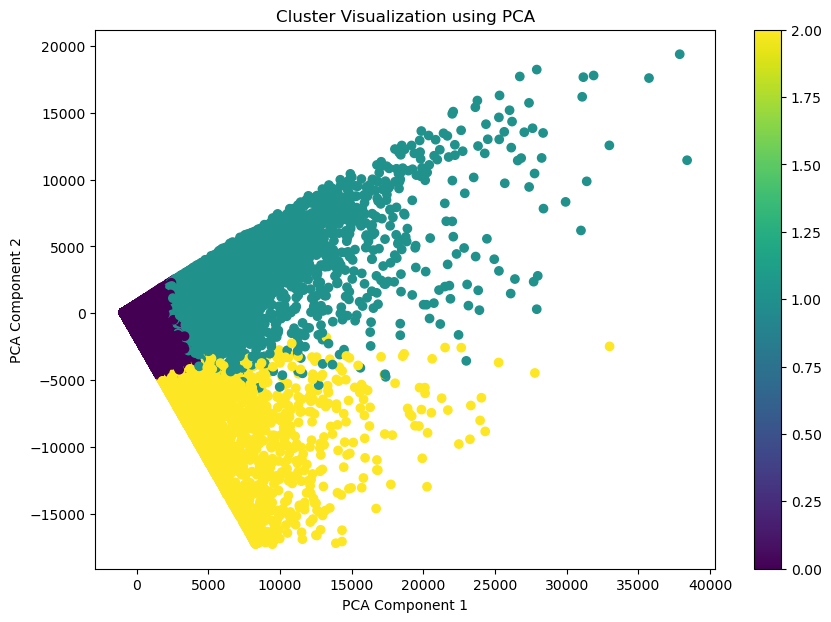

In [7]:

n_clusters = 3

# Clustering using KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X_numpy)

# 2. Evaluate the Clustering

# Silhouette Score (Higher is better, range from -1 to 1)
sil_score = silhouette_score(X_numpy, df['cluster'])
print(f'Silhouette Score: {sil_score}')

# Inertia (Lower is better)
inertia = kmeans.inertia_
print(f'Inertia (Within-cluster sum of squares): {inertia}')

# 3. Visualization of Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_numpy)

# Plot the clusters in 2D space
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [8]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(X_numpy, df['cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 2.2571016901848706


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_texts, test_texts, train_scores, test_scores = train_test_split(
    df['cleaned_reviews'], df['score'], test_size=0.2, random_state=42
)

# Vectorize the text data
train_X = vectorizer(train_texts)
test_X = vectorizer(test_texts)

# Convert to numpy arrays
train_X_numpy = train_X.numpy()
test_X_numpy = test_X.numpy()
train_scores_numpy = train_scores.values
test_scores_numpy = test_scores.values


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Embedding(input_dim=max_tokens, output_dim=64, input_length=max_len),  # Embedding layer
    GlobalAveragePooling1D(),  # Pooling layer
    Dense(128, activation='relu'),  # Hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='mean_squared_error',  # Loss function for regression
              metrics=['mae'])  # Mean Absolute Error as metric


In [13]:
# Train the model
history = model.fit(
    train_X_numpy, train_scores_numpy,
    epochs=10,
    validation_data=(test_X_numpy, test_scores_numpy)
)


Epoch 1/10

3743/3743 [==============================] - 56s 15ms/step - loss: 1.1047 - mae: 0.6917 - val_loss: 0.8066 - val_mae: 0.5782
Epoch 2/10
3743/3743 [==============================] - 50s 13ms/step - loss: 0.7639 - mae: 0.5876 - val_loss: 0.7619 - val_mae: 0.5453
Epoch 3/10
3743/3743 [==============================] - 46s 12ms/step - loss: 0.7002 - mae: 0.5494 - val_loss: 0.7165 - val_mae: 0.5678
Epoch 4/10
3743/3743 [==============================] - 46s 12ms/step - loss: 0.6406 - mae: 0.5087 - val_loss: 0.6930 - val_mae: 0.5286
Epoch 5/10
3743/3743 [==============================] - 48s 13ms/step - loss: 0.6032 - mae: 0.4843 - val_loss: 0.6752 - val_mae: 0.5230
Epoch 6/10
3743/3743 [==============================] - 48s 13ms/step - loss: 0.5816 - mae: 0.4722 - val_loss: 0.7023 - val_mae: 0.4783
Epoch 7/10
3743/3743 [==============================] - 49s 13ms/step - loss: 0.5642 - mae: 0.4620 - val_loss: 0.6941 - val_mae: 0.5857
Epoch 8/10
3743/3743 [=========================

In [15]:
def predict_score(text):
    # Preprocess and vectorize the text
    cleaned_text = preprocess_text(text)
    vectorized_text = vectorizer(tf.constant([cleaned_text]))
    # Convert to numpy array
    vectorized_text_numpy = vectorized_text.numpy()
    # Predict the score
    predicted_score = model.predict(vectorized_text_numpy)
    return predicted_score[0][0]

# Example usage
new_text = "This is an example review."
predicted_score = predict_score(new_text)
print(f'Predicted Score: {predicted_score}')


1/1 [==============================] - 0s 73ms/step
Predicted Score: 4.066926956176758


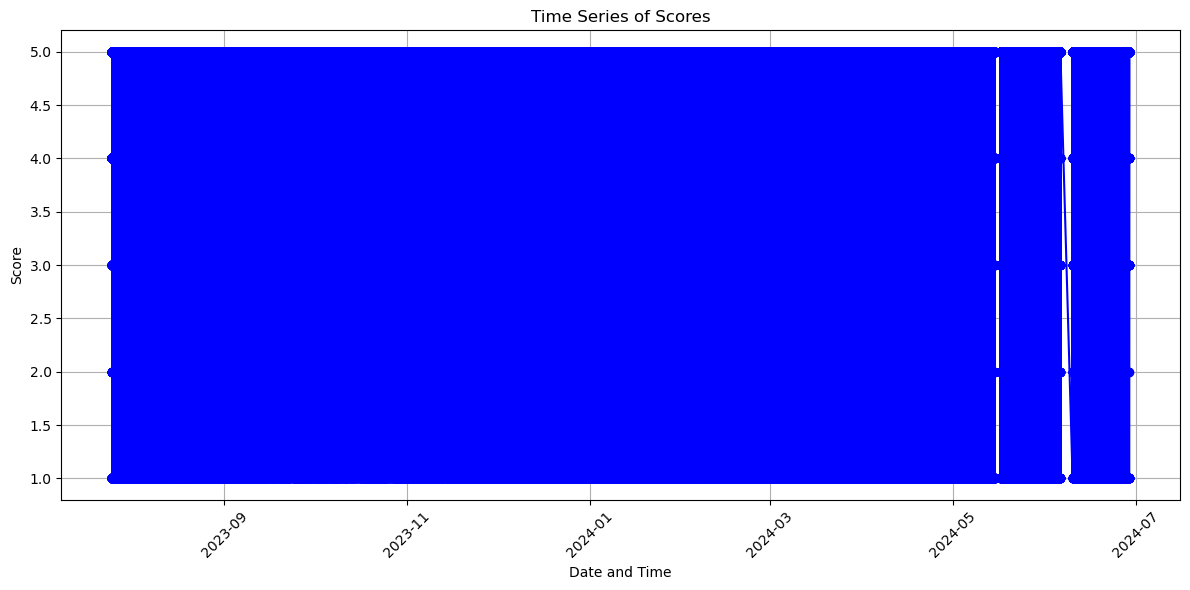

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (Assuming you already have df with 'at' and 'score' columns)
# df = pd.read_csv('your_data.csv')  # Load your data

# Convert 'at' column to datetime
df['at'] = pd.to_datetime(df['at'], format='%d-%m-%Y %H:%M')

# Sort data by datetime
df = df.sort_values('at')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['at'], df['score'], marker='o', linestyle='-', color='b')

# Formatting
plt.title('Time Series of Scores')
plt.xlabel('Date and Time')
plt.ylabel('Score')
plt.grid(True)

# Optional: Rotate date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()  # Adjusts plot to fit labels
plt.show()
